In [2]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from sklearn import datasets

digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

In [8]:
digits.target.shape

(1797,)

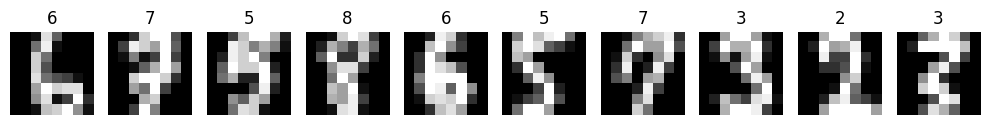

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
indices = np.random.choice(len(digits.images), 10, replace=False)
plt.figure(figsize=(10, 2))
for i, idx in enumerate(indices):
    plt.subplot(1, 10, i + 1)
    plt.imshow(digits.images[idx], cmap='gray')
    plt.title(str(digits.target[idx]))
    plt.axis('off')
plt.tight_layout()
plt.show()

# Support Vector Machine (SVM)

In [ ]:
from sklearn.model_selection import train_test_split

data = digits.images.reshape((len(digits.images), -1))
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((898, 64), (898,), (899, 64), (899,))

In [30]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [32]:
predicted = clf.predict(x_test)
predicted.shape

(899,)

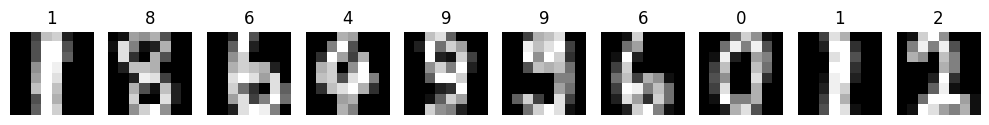

In [33]:
plt.figure(figsize=(10, 2))
for idx, img, pred in zip(range(10), x_test, predicted):
    plt.subplot(1, 10, idx + 1)
    plt.imshow(img.reshape(8, 8), cmap='gray')
    plt.title(str(predicted[idx]))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [34]:
from sklearn import metrics
print("Classification report:\n", metrics.classification_report(y_test, predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       0.98      1.00      0.99        84
           2       1.00      1.00      1.00        87
           3       1.00      0.95      0.97        96
           4       1.00      0.99      0.99        90
           5       0.97      0.98      0.97        85
           6       0.99      0.99      0.99        93
           7       0.96      1.00      0.98        91
           8       0.96      0.95      0.95        94
           9       0.95      0.95      0.95        83

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



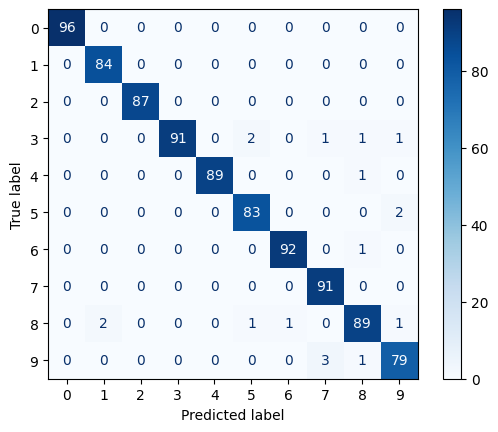

In [35]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display = ConfusionMatrixDisplay(confusion_matrix(y_test, predicted), display_labels=digits.target_names)
display.plot(cmap=plt.cm.Blues)